# Klimpåverkan svensk bygg- och fastighetsbransch

# - Scenarion över klimatpåverkan för att möta bostads- och lokalbehov i Sverige fram till 2100

Enligt Sveriges klimatpolitiska ramverk är målet att Sverige inte ska ha några nettoutsläpp av växthusgaser senast år 2045. därefter ska vi uppnå negativa utsläpp.

[Fossilfritt Sverige](https://fossilfrittsverige.se/roadmap/bygg-och-anlaggningssektorn/) förtydligar detta i delmål i sin färdplan:

2022: Aktörer i bygg- och anläggningssektorn har kartlagt sina utsläpp och satt klimatmål

2025: Utsläppen av växthusgaser visar en tydligt minskande trend

2030: 50% minskade utsläpp av växthusgaser (jmf 2015)

2040: 75% minskade utsläpp av växthusgaser (jmf 2015)

2045: Netto nollutsläpp av växusgaser

Enligt [Boverkets miljöindikatorer](https://www.boverket.se/sv/byggande/hallbart-byggande-och-forvaltning/miljoindikatorer---aktuell-status/) stod bygg och fastighetssektorn för utsläpp om 18,9 miljoner ton CO<sub>2</sub> 2021. Dessa fördelar sig på

* Uppvärmning: 4,8 miljoner ton
* Fastighetsförvaltning: 4,6 miljoner ton
* Renovering, om- och tillbyggnad: 5,5 miljoner ton
* Nybyggnad: 4,1 miljoner ton

In [119]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Befolkningsdata

[Eurostat](https://ec.europa.eu/eurostat/databrowser/view/proj_23np__custom_10819918/default/table?lang=en) tillhandahåller mängder av intressant data, bland annat befolkningsprognoser för europeiska länder. Denna data går även att fördela på olika åldersgrupper. Nedan har vi deras prognos för den svenska befolkningen fram till 2100, fördelat på total befolkning, <20 år, 20-64 år, >65 år samt >80 år.

Dessa kohorter har valts ut då de enkelt representerar olika boende- och lokalbehov:
* De <20 år bor generellt sett hos en eller flera vårdnadshavare samt går i förskola, grundskola eller gymnasium.
* De mellan 20 och 64 som har behov av ett eget boende samt en arbetsplats, alternativt plats på utbildning efter gymnasienivå.
* De över 80 som har ett större behov att vårdboende eller andra anpassade boendeformer. Andelen som kan behöva ett specialboende är cirka 10% enligt [SCB](https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/boende-i-sverige/#alder-och-livssituation)

Dessa kohorter är inte perfekt representativa för svenska förhållande men är tillräckligt för syftet här.

Det finns även andra kohorter som kan vara intressanta att studera, exempelvis
* Ca 20-25, en ålder då många studerar på universitet och högskola (ca 30% enligt [SCB](https://www.scb.se/hitta-statistik/sverige-i-siffror/utbildning-jobb-och-pengar/utbildningsnivan-i-sverige/)). Andelen av dessa som bor i studentbostad är ca 10% ([SCB](https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/boende-i-sverige/#alder-och-livssituation)).
* Ca 30-55 mellan vilken den genomsnittliga föräldern får sitt första barn tills dess att dessa har flyttat hemifrån.

Dessa kräver viss aggregering av data som kan utföras vid intresse och behov.

In [120]:
df_population_projection = pd.read_excel("data\population_combined.xlsx", index_col=0)

df_population_projection

,2022,2023,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,,,,
Total,10452326,10561077,10705814,11020442,11302547,11581390,11862065,12130240,12365036,12563488,12732058,12884585,13020332,13127074,13194563,13233792,13263550,13278186
Ålder < 20,2430074,2455717,2487377,2503007,2483065,2486564,2535750,2582708,2624664,2636873,2621036,2603005,2599917,2607816,2612584,2602866,2578113,2547040
20 < Ålder < 64,5903486,5956186,6018870,6176791,6319983,6467617,6608541,6712922,6718192,6683492,6769374,6844677,6842097,6798466,6751983,6730125,6709049,6694194
Ålder > 65,2118766,2149174,2199567,2340644,2499499,2627209,2717774,2834610,3022180,3243123,3341648,3436903,3578318,3720792,3829996,3900801,3976388,4036952
Ålder > 80,559634,583289,643438,781312,837553,878545,944694,1045124,1126920,1171424,1234633,1364835,1523645,1562592,1586484,1660002,1763699,1855792


In [121]:
# 2022-2023 har redan passerat så vi släpper dessa
df_population_projection = df_population_projection.drop(['2022', '2023'], axis=1)

Vi plottar ett diagram för att illustrera hur de olika grupperna fördelar sig.

<Axes: xlabel='År', ylabel='Befolkning'>

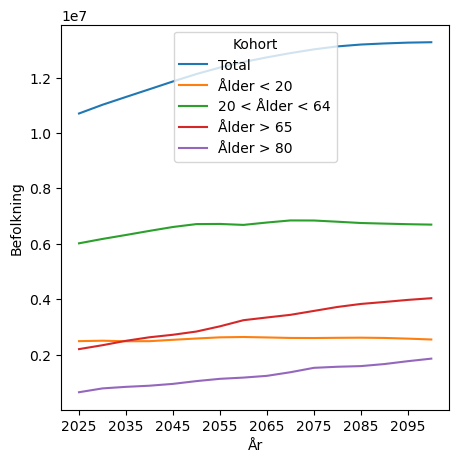

In [122]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_ylabel('Befolkning',fontsize=10)
ax.set_xlabel('År',fontsize=10)

df_population_projection.T.plot(ax=ax)

De kommande 40 åren kommer vi se en stadigt ökande befolkning, men en utplaning ca 13 miljoner runt 2075. Den kohort som ökar mest är de >65 år. Något som diskuterats i andra sammanhang som t.ex. försörjningskvot. Här håller vi oss dock till att titta på boende- och lokalbehovet.

In [123]:
df_population_projection.index

Index(['Total', 'Ålder < 20', '20 < Ålder < 64', 'Ålder > 65', 'Ålder > 80'], dtype='object', name='Kohort')

In [124]:
df_population_projection_total = df_population_projection.drop(['Ålder < 20', '20 < Ålder < 64', 'Ålder > 65', 'Ålder > 80'])
df_population_projection_total

,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,,
Total,10705814,11020442,11302547,11581390,11862065,12130240,12365036,12563488,12732058,12884585,13020332,13127074,13194563,13233792,13263550,13278186


Vi kan även behöva se hur befolkningen ökar i absoluta tal per varje femårsperiod:

In [125]:
df_population_total_increase = df_population_projection_total.diff(1, 1).drop(['2025', ], axis=1)
df_population_total_increase

,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,
Total,314628,282105,278843,280675,268175,234796,198452,168570,152527,135747,106742,67489,39229,29758,14636


## Klimatdata

Nedan presenteras klimatpåverkan per byggdel och summa för nybyggnad av flerbostadshus, kontor och ett genomsnitt för samtliga byggnadstyper ([Referensvärden för klimatpåverkan vid uppförande av byggnader. Version 3, 2023](https://www.diva-portal.org/smash/get/diva2:1812831/FULLTEXT01.pdf)). Värdena för klimatpåverkan är baserade på klimatförbättrade produktval för betong, 
konstruktionsstål och aluminium då detta troligtvis kommer vara ett minimikrav för att klara framtida klimatkrav.

Värden anges i kg CO2ekv/m<sup>2</sup> BTA.

In [126]:
climate_data = {'Kontor': [32, 117, 11, 35, 33, 19, 40, 17, 304], 'Flerbostadshus': [30, 151, 12, 34, 18, 31, 17, 16, 309], 'Småhus': [38, 7, 28, 33, 5, 23, 10, 11, 155],'Alla byggnader': [49, 88, 27, 34, 20, 24, 21, 15, 278]}
df_climatedata = pd.DataFrame(data=climate_data, index=['Byggdel 2 husunderbyggnad', 'Byggdel 3 stomme', 'Byggdel 4 yttertak', 'Byggdel 5 Fasader', 'Byggdel 6 stomkompl.', 'Byggdel 7 rumskompl.', 'Byggdel 8 installationer exkl solceller', 'A5 Energi', 'Summa'])
df_climatedata

,Kontor,Flerbostadshus,Småhus,Alla byggnader
Byggdel 2 husunderbyggnad,32,30,38,49
Byggdel 3 stomme,117,151,7,88
Byggdel 4 yttertak,11,12,28,27
Byggdel 5 Fasader,35,34,33,34
Byggdel 6 stomkompl.,33,18,5,20
Byggdel 7 rumskompl.,19,31,23,24
Byggdel 8 installationer exkl solceller,40,17,10,21
A5 Energi,17,16,11,15
Summa,304,309,155,278


## Bostads- och lokalarea

SCB har statistik för bostads- och lokalarean per län i Sverige, senast uppdaterad 2020 ([Bostads- och lokalarea i tätorter, efter region - SCB](https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__MI__MI0810__MI0810B/BostLokiTatortReg/))

In [127]:
df_boa = pd.read_excel("data\Bostadsarea per län.xlsx", index_col=0)
df_boa.head()

,Småhus,Hyreshus,Totalt
Stockholms län,35427,53891,89362
Uppsala län,6200,6977,13181
Södermanlands län,5861,5261,11123
Östergötlands län,8594,8789,17395
Jönköpings län,8503,5343,13849


In [128]:
# Tabellvärdena är angivna i tusental
boa_total = df_boa['Totalt'].sum() * 1000
boa_total

393950000

Total bostadsarea i Sverige (för 2020) var alltså 393 950 000 m<sup>2</sup>.

Baserat på detta kan vi se hur den genomsnittliga bostadsarean per person skulle se ut utan en förändring i beståndet:

In [129]:
df_average_boa = boa_total / df_population_projection_total
df_average_boa

,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,,
Total,36.797762,35.747205,34.854976,34.015779,33.210912,32.476686,31.859996,31.356738,30.941581,30.575296,30.256525,30.010496,29.856995,29.76849,29.701701,29.668962


Vi skulle gå från en genomsnittlig bostadsarea om cirka 37 m<sup>2</sup> år 2025 till cirka 30 m<sup>2</sup> år 2100, en minskning med 19%.

30 m<sup>2</sup> per person låter dock fullt rimligt, förutsatt att det är relativt jämlikt fördelat. Nu är så inte fallet utan det finns stora skillnader baserat på ålder, storstad kontra landsbyggd och hushållens ekonomi. Mer om detta senare.

In [130]:
df_loa = pd.read_excel("data\Lokalarea per län.xlsx", index_col=0)

df_loa.head()

,LOA
Stockholms län,39323
Uppsala län,5167
Södermanlands län,5260
Östergötlands län,9993
Jönköpings län,12341


In [131]:
loa_total = df_loa['LOA'].sum() * 1000
loa_total

214990000

In [132]:
df_average_loa = loa_total / df_population_projection_total
df_average_loa

,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,,
Total,20.081612,19.508292,19.021376,18.563402,18.124163,17.723475,17.386929,17.112286,16.885723,16.68583,16.511868,16.377603,16.293833,16.245533,16.209084,16.191218


Analogt med bostadsarean så skulle lokalarean per person minska från ca 20 m<sup>2</sup> till 16 m<sup>2</sup> mellan 2025-2100, även här en minskning med 19%, om det inte uppfördes några nya lokalbyggnader. 

# Scenarion
* Spara och bevara - Ingen nybyggnad, underhåll av befintligt. Här antas endast byggdelarna 4 (yttertak), 5 (fasader), 7 (rumskomplettering) och 8 (installationer) kräva underhåll, stomme och husunderbyggnad antas ha evig teknisk livslängd. 
* Business as usual - nybyggnad motsvarande samma mängd bostäder och lokaler, dock klimatförbättrat utförande för betong, konstruktionsstål och aluminium.

## Scenario 0 - Spara och bevara
Låt oss anta att vi inte gör någon nybyggnad och att Sverige klarar sig på en ~20 procents minskning av lokal- och bostadsutbudet. Detta nollar den post som för 2021 stod för 4,1 miljoner ton CO2ekv, motsvarande ca 22%. Detta är ett förenklat scenario, bland annat då behovet av byggnader varierar lokalt över tid medföretagstebleringar och in- och utflytt mellan olika län.

Dock kommer fortfarande befintliga byggnader behöva underhållas och renoveras. Byggnader håller inte för evigt och olika byggnadsdelar har olika teknisk livslängd. Nedan finns uppskattade värden på teknisk livslängd per byggdel:

* Byggdel 2 husunderbyggnad - 150 år
* Byggdel 3 stomme - 150 år
* Byggdel 4 yttertak - 30 år
* Byggdel 5 fasader - 40 år
* Byggdel 6 stomkomplettering - 30 år
* Byggdel 7 rumskomplettering - 20 år
* Byggdel 8 installationer - 20 år

Dessa anger intervallet med vilken en byggdel bör bytas, ex var 30:e år bör yttertak bytas. 

När stomme och underbyggnad är uttjänt antas hela byggnaden rivas. Vi antar dock att detta ligger utanför vårt intervall.

In [133]:
frequency_data = {'Frekvens': [1/30, 1/40, 1/30, 1/20, 1/20],}
df_frequency = pd.DataFrame(data=frequency_data, index=['Byggdel 4 yttertak', 'Byggdel 5 Fasader', 'Byggdel 6 stomkompl.', 'Byggdel 7 rumskompl.', 'Byggdel 8 installationer exkl solceller'])
df_frequency

,Frekvens
Byggdel 4 yttertak,0.033333
Byggdel 5 Fasader,0.025000
Byggdel 6 stomkompl.,0.033333
Byggdel 7 rumskompl.,0.050000
Byggdel 8 installationer exkl solceller,0.050000


Låt oss räkna ut vad klimatpåverkan är per byggdel och år:

In [134]:
df_yearly_maintenance_impact = df_climatedata[2:7].multiply(df_frequency['Frekvens'], axis="index")
df_yearly_maintenance_impact.loc['Summa']= df_yearly_maintenance_impact.sum()
df_yearly_maintenance_impact

,Kontor,Flerbostadshus,Småhus,Alla byggnader
Byggdel 4 yttertak,0.366667,0.40,0.933333,0.900000
Byggdel 5 Fasader,0.875000,0.85,0.825000,0.850000
Byggdel 6 stomkompl.,1.100000,0.60,0.166667,0.666667
Byggdel 7 rumskompl.,0.950000,1.55,1.150000,1.200000
Byggdel 8 installationer exkl solceller,2.000000,0.85,0.500000,1.050000
Summa,5.291667,4.25,3.575000,4.666667


Notera att enheten här är kg CO2ekv/(m<sup>2</sup> BTA, år).

Värdena här går även att utläsa som potentialen att använda återbruk för en viss byggdel. Det vill säga, högre värde ger en högre potential att minska branschens klimatpåverkan via återbruk. Dock behöver man sedan ta hänsyn till den tekniska och ekonomiska aspekten.

Med dessa värden kan vi räkna ut klimatpåverkan från underhållet av det befintliga beståndet (i miljoner ton):

In [135]:
yearly_maintenance_impact_tonne = (df_yearly_maintenance_impact.loc['Summa', 'Kontor'] * loa_total + 
                             df_yearly_maintenance_impact.loc['Summa', 'Småhus'] * df_boa['Småhus'].sum() + 
                             df_yearly_maintenance_impact.loc['Summa', 'Flerbostadshus'] * df_boa['Hyreshus'].sum()) / 1000

yearly_maintenance_impact_tonne / (10 ** 6)

1.1391880380916668

En bra bit under de 5,5 miljoner ton som anges för Boverkets miljöindikatorer för posten *Renovering, om- och tillbyggnad*. Detta omfattar ju dock även om- och tillbyggnad som kan driva upp värdet avsevärt. Därtill görs många renoveringar av andra skäl än att den tekniska livslängden är uppnådd.

## Scenario 1 - (Almost) Business as Usual
Hur kommer utsläppen från nybyggnad se ut om vi vill behålla den genomsnittliga boytan och lokalytan för en ökande befolkning? För enkelhet skull antar vi att nybyggnad av bostäder bara omfattar flerbostadshus, och som tidigare nämnt antar vi att nyproduktion sker med klimatförbättrade produktval för betong, konstruktionsstål och aluminium. Låt oss även anta att livscykelmodul A5 energi är klimatneutral.

In [136]:
df_emissions_new_apartments_tonne = df_population_total_increase * 37 * (df_climatedata.loc['Summa', 'Flerbostadshus'] - 
                                                                         df_climatedata.loc['A5 Energi', 'Flerbostadshus']) / 1000
df_emissions_new_offices_tonne = df_population_total_increase * 20 * (df_climatedata.loc['Summa', 'Kontor'] - 
                                                                      df_climatedata.loc['A5 Energi', 'Flerbostadshus']) / 1000
df_emissions_new_total_tonne = df_emissions_new_apartments_tonne + df_emissions_new_offices_tonne
df_emissions_new_total_tonne

,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,
Total,5223139.428,4683225.105,4629072.643,4659485.675,4451973.175,3897848.396,3294501.652,2798430.57,2532100.727,2253535.947,1772023.942,1120384.889,651240.629,494012.558,242972.236


Absoluta tal är lite abstrakta så vi kan räkna fram andelen av utsläppen år 2021:

In [137]:
df_emissions_new_total_tonne / (4.1 * 10**6)

,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Kohort,,,,,,,,,,,,,,,
Total,1.273936,1.14225,1.129042,1.13646,1.085847,0.950695,0.803537,0.682544,0.617586,0.549643,0.432201,0.273265,0.158839,0.120491,0.059262


Även med klimatförbättrat utförande och klimatneutral modul *A5 Energi* så har vi ökande utsläpp fram till 2045. Därtill tillkommer det klimatpåverkan från underhåll av det befintliga och tillkommande bestånder.

In [139]:
cwd = os.getcwd()
with pd.ExcelWriter(f'{cwd}\export.xlsx') as writer:
    df_population_projection.to_excel(writer, sheet_name='population projection')
    # df_climatedata.to_excel(writer, sheet_name='climate data')
    # df_average_boa.to_excel(writer, sheet_name='average boa')
    # df_average_loa.to_excel(writer, sheet_name='average loa')
    df_yearly_maintenance_impact.to_excel(writer, sheet_name='maintenance impact')
    df_emissions_new_total_tonne.to_excel(writer, sheet_name='new build emissions')